In [1]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('Datasets//laptop_price.csv')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


### General info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [6]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### Outlier Removal

Text(0.5, 1.0, 'Price_euros Before Outlier Removal')

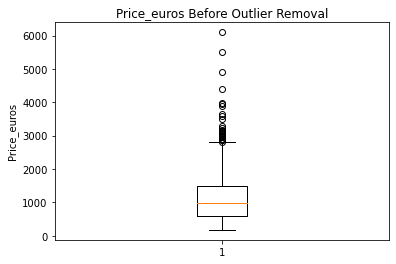

In [7]:
plt.boxplot(df['Price_euros'])
plt.ylabel('Price_euros')
plt.title('Price_euros Before Outlier Removal')

In [8]:
df=df.drop(df[df.Price_euros>2500].index)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


{'whiskers': [<matplotlib.lines.Line2D at 0x1b629270760>,
 'caps': [<matplotlib.lines.Line2D at 0x1b629270e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b629270400>],
 'medians': [<matplotlib.lines.Line2D at 0x1b62927a550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b62927a8b0>],
 'means': []}

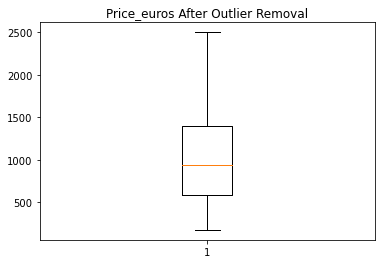

In [9]:
plt.title('Price_euros After Outlier Removal')
plt.boxplot(df['Price_euros'])

### Insights

<AxesSubplot:>

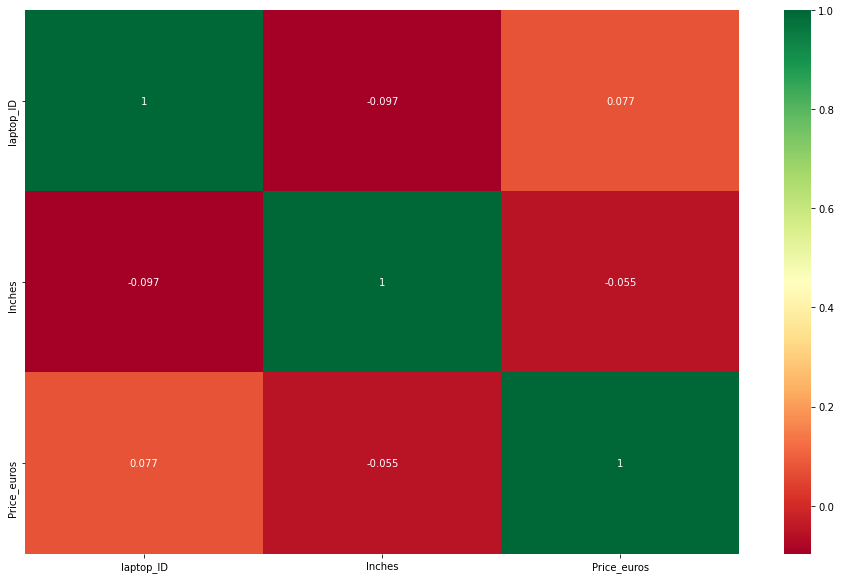

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

#### Feature Addition

In [11]:
df['Ram']=df['Ram'].str.strip('GB').astype(int)
df['Memory_size']=df['Memory'].apply(lambda x: re.sub(r'\.0|GB','',str(x).replace('TB','000')))
df['Memory_size']=df['Memory_size'].apply(lambda x: sum(int(re.search(r'\d+',s).group()) for s in x.split('+')))
df['Weight']=df['Weight'].str.strip('kg').astype(float)
df['Memory']=df['Memory'].astype(str)
df['SSD or Not or Both']=df.Memory.apply(lambda x: 'both' if 'SSD' in x and 'HDD' in x else 'Yes' if 'SSD' in x else 'No')
df['Gpu_company'] = df.Gpu.apply(lambda x: x.split(' ')[0])
df['Cpu_company']=df['Cpu'].str.split(' ', 1, expand=True)[0]
df['Cpu_type']=df['Cpu'].str.split(' ', 1, expand=True)[1].apply(lambda x: x.split(' ')[1] if x.split(' ')[0]=='Core' else x.split(' ')[0])

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

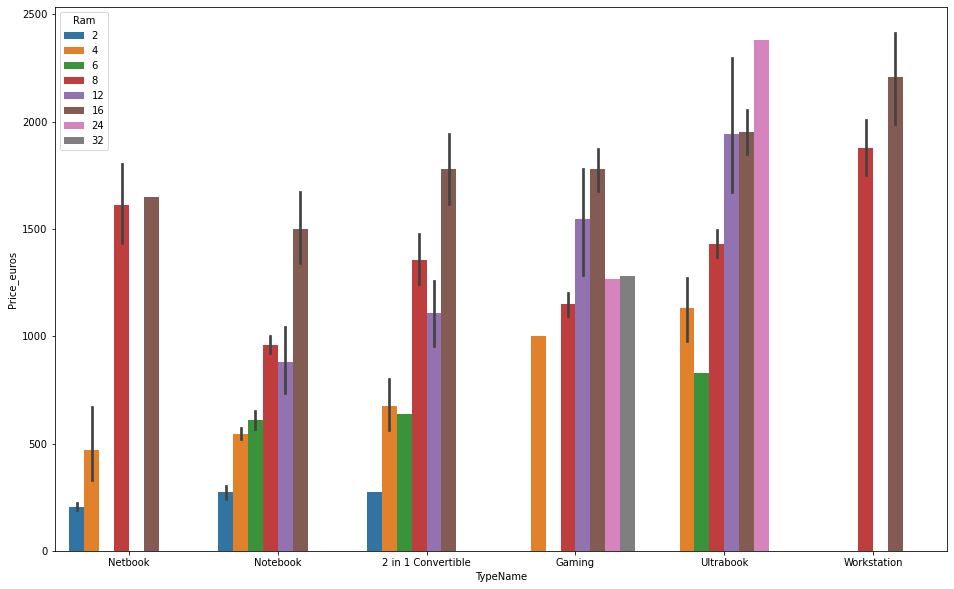

In [12]:
plt.figure(figsize=(16,10))
result = df.groupby(['TypeName'])['Price_euros'].aggregate(np.median).reset_index().sort_values('Price_euros')
sns.barplot(x='TypeName', y="Price_euros", hue='Ram',data=df, order=result["TypeName"])

<AxesSubplot:ylabel='TypeName'>

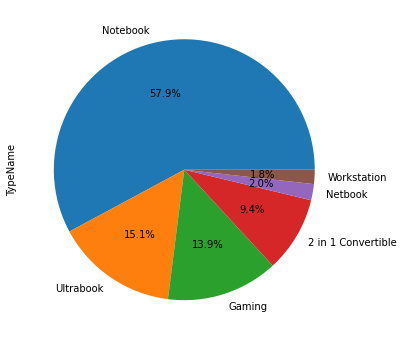

In [13]:
plt.figure(figsize=(8,6))
round(df["TypeName"].value_counts()/df.shape[0]*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

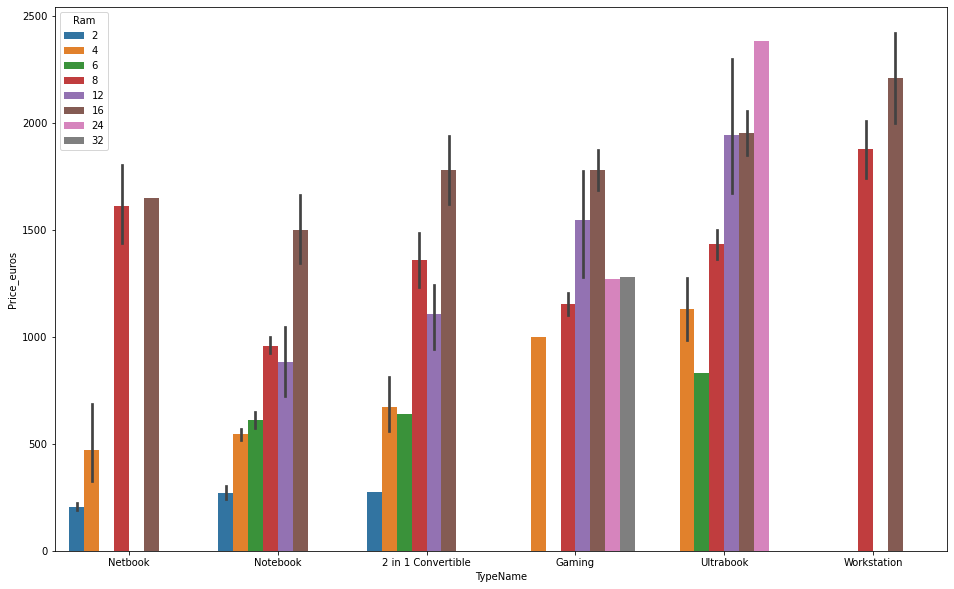

In [14]:
plt.figure(figsize=(16,10))
result = df.groupby(['TypeName'])['Price_euros'].aggregate(np.median).reset_index().sort_values('Price_euros')
sns.barplot(x='TypeName', y="Price_euros", hue='Ram',data=df, order=result["TypeName"])

<AxesSubplot:xlabel='Company', ylabel='count'>

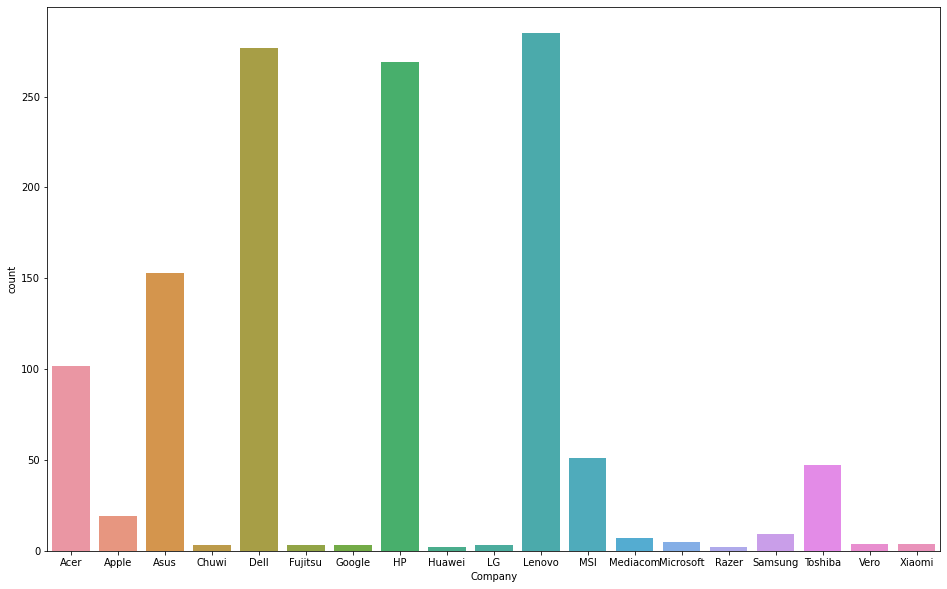

In [15]:
plt.figure(figsize=(16,10))
result = df.groupby(['Company']).aggregate(np.mean).reset_index().sort_values('Company')
sns.countplot(x='Company',data=df, order=result["Company"])

C:\Users\khale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Laptop By Company Average Price'}, xlabel='Price_euros', ylabel='Company'>

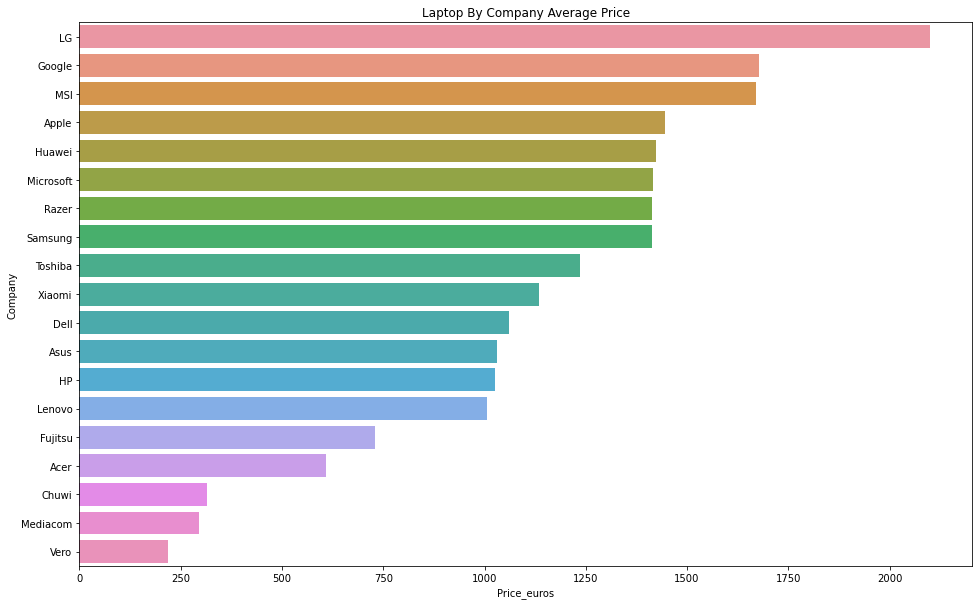

In [16]:
plt.figure(figsize=(16,10))
c = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
plt.title('Laptop By Company Average Price')
sns.barplot(c, c.index)

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

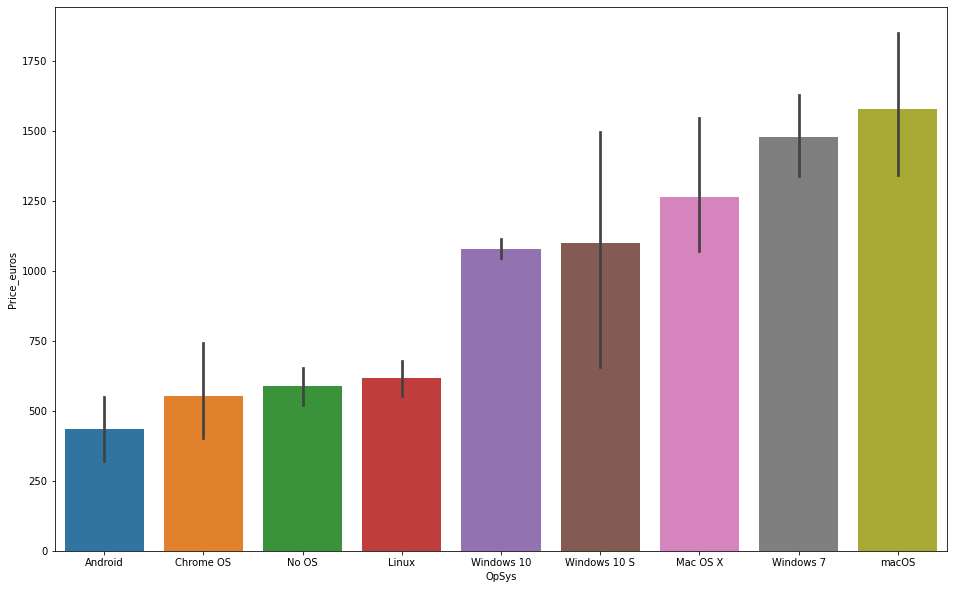

In [17]:
plt.figure(figsize=(16,10))
result = df.groupby(["OpSys"])['Price_euros'].aggregate(np.mean).reset_index().sort_values('Price_euros')
sns.barplot(x='OpSys', y="Price_euros", data=df, order=result['OpSys'])

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

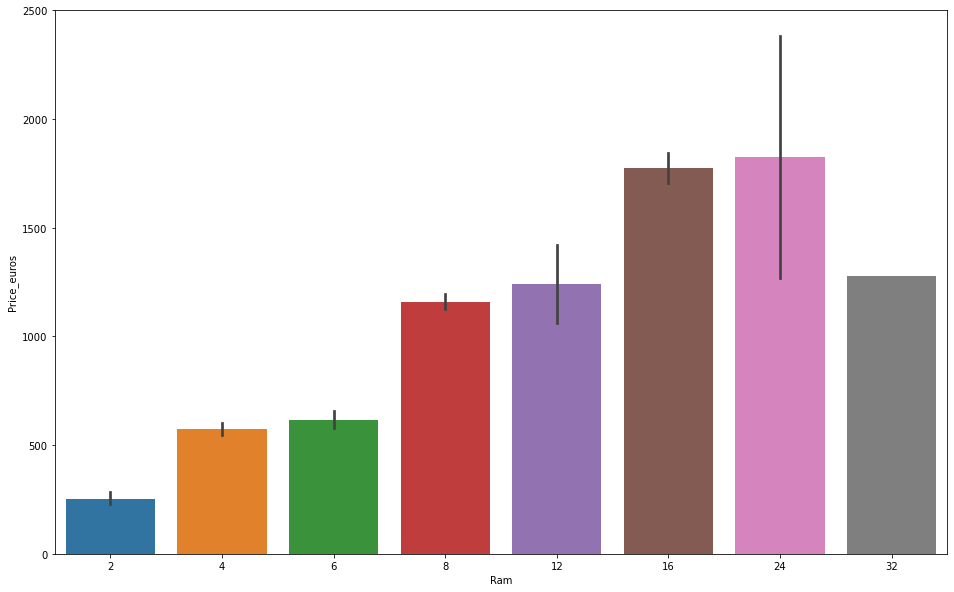

In [18]:
plt.figure(figsize=(16,10))
result = df.groupby(["Ram"])['Price_euros'].aggregate(np.median).reset_index().sort_values('Ram')
sns.barplot(x='Ram', y="Price_euros", data=df, order=result['Ram'])

C:\Users\khale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SSD or Not or Both', ylabel='count'>

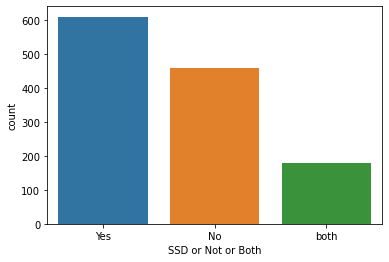

In [19]:
sns.countplot(df['SSD or Not or Both'])

<AxesSubplot:xlabel='Memory_size', ylabel='Price_euros'>

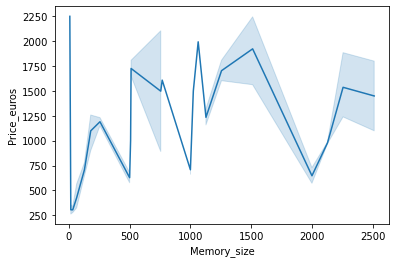

In [20]:
sns.lineplot(x='Memory_size',y='Price_euros',data=df)

C:\Users\khale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Laptop By Cpu Company Average Price'}, xlabel='Price_euros', ylabel='Cpu_company'>

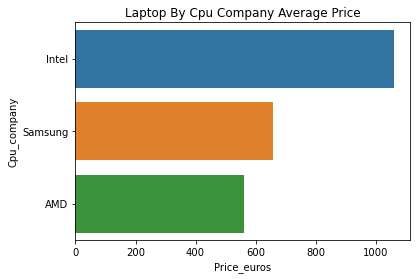

In [21]:
p = df.groupby('Cpu_company')['Price_euros'].mean().sort_values(ascending=False)
plt.title('Laptop By Cpu Company Average Price')
sns.barplot(p, p.index)

C:\Users\khale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Laptop By Cpu Company Average Price'}, xlabel='Price_euros', ylabel='Gpu_company'>

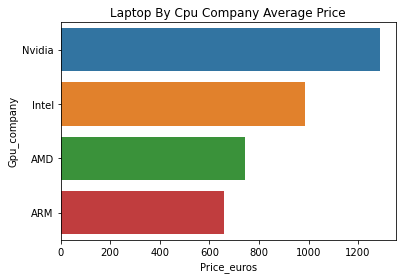

In [22]:
g=df.groupby('Gpu_company').Price_euros.mean().sort_values(ascending=False)
plt.title('Laptop By Cpu Company Average Price')
sns.barplot(g, g.index)

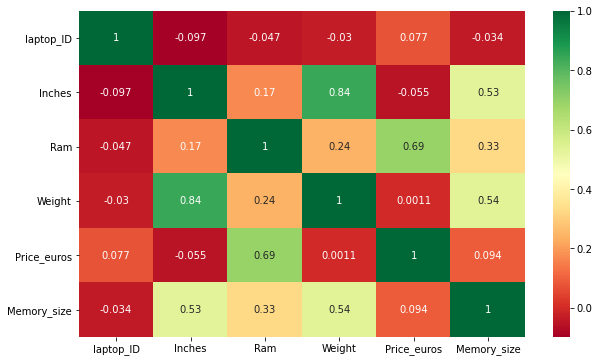

In [23]:
plt.figure(figsize=(10,6))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [24]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_size,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,Yes,Intel,Intel,i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,No,Intel,Intel,i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,Yes,Intel,Intel,i5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,Yes,Intel,Intel,i5
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,500,No,AMD,AMD,A9-Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,128,Yes,Intel,Intel,i7
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,512,Yes,Intel,Intel,i7
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,64,No,Intel,Intel,Celeron
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000,No,AMD,Intel,i7


### Drop Unnecessary Columns

In [25]:
df.drop(['Cpu','Weight','laptop_ID','OpSys','Inches','ScreenResolution','Memory','Gpu','Memory_size'],inplace=True,axis=1)
df

,Company,Product,TypeName,Ram,Price_euros,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,Apple,MacBook Pro,Ultrabook,8,1339.69,Yes,Intel,Intel,i5
1,Apple,Macbook Air,Ultrabook,8,898.94,No,Intel,Intel,i5
2,HP,250 G6,Notebook,8,575.00,Yes,Intel,Intel,i5
4,Apple,MacBook Pro,Ultrabook,8,1803.60,Yes,Intel,Intel,i5
5,Acer,Aspire 3,Notebook,4,400.00,No,AMD,AMD,A9-Series
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,638.00,Yes,Intel,Intel,i7
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,1499.00,Yes,Intel,Intel,i7
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,229.00,No,Intel,Intel,Celeron
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,764.00,No,AMD,Intel,i7


### Label Encoder

In [26]:
le={}
for col in set(df.columns).difference({'Price_euros'}):
    le[col] = LabelEncoder()
    df[col]  = le[col].fit_transform(df[col])
df

,Company,Product,TypeName,Ram,Price_euros,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,295,4,3,1339.69,1,2,1,16
1,1,296,4,3,898.94,0,2,1,16
2,7,50,3,3,575.00,1,2,1,16
4,1,295,4,3,1803.60,1,2,1,16
5,0,58,3,1,400.00,0,0,0,5
...,...,...,...,...,...,...,...,...,...
1298,10,564,0,1,638.00,1,2,1,17
1299,10,572,0,5,1499.00,1,2,1,17
1300,10,192,3,0,229.00,0,2,1,7
1301,7,2,3,2,764.00,0,0,1,17


### Feature Scaling

In [27]:
def normalize_col(col_name):
    return (df[col_name] - df[col_name].min())/(df[col_name].max()-df[col_name].min())

for col in ['Product','Price_euros']:
    df[col]=normalize_col(col) 
df

,Company,Product,TypeName,Ram,Price_euros,SSD or Not or Both,Gpu_company,Cpu_company,Cpu_type
0,1,0.491667,4,3,0.501372,1,2,1,16
1,1,0.493333,4,3,0.311802,0,2,1,16
2,7,0.083333,3,3,0.172473,1,2,1,16
4,1,0.491667,4,3,0.700903,1,2,1,16
5,0,0.096667,3,1,0.097204,0,0,0,5
...,...,...,...,...,...,...,...,...,...
1298,10,0.940000,0,1,0.199570,1,2,1,17
1299,10,0.953333,0,5,0.569892,1,2,1,17
1300,10,0.320000,3,0,0.023656,0,2,1,7
1301,7,0.003333,3,2,0.253763,0,0,1,17


### Train and Test

In [28]:
x=df.drop('Price_euros',axis=1)
y=df.Price_euros
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### 1. Linear Regression

In [29]:
lr= LinearRegression()
lr.fit(x,y)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6203122344083705
0.6244390136800526


In [30]:
lr_pred = lr.predict(x_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_accuracy= r2_score(y_test, lr_pred)
print('Linear Regression MAE: ',lr_mae)
print('Linear Regression MSE: ',lr_mse)
print('Linear Regression RMSE: ',lr_rmse)
print("Linear Regression R2: ",lr_accuracy)

Linear Regression MAE:  0.11025078239517985
Linear Regression MSE:  0.02012993157104445
Linear Regression RMSE:  0.14187999003046362
Linear Regression R2:  0.6244390136800526


Text(0, 0.5, 'Predicted Values')

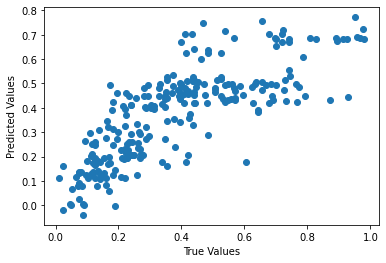

In [31]:
plt.scatter(y_test,lr_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [32]:
cdf_lr=pd.DataFrame(lr.coef_,x.columns,columns=['Coeff'])
cdf_lr

,Coeff
Company,0.004631
Product,0.108958
TypeName,0.013179
Ram,0.087927
SSD or Not or Both,0.066540
Gpu_company,0.023480
Cpu_company,-0.086916
Cpu_type,0.013668


### 2. Decision Tree

In [33]:
dtr=DecisionTreeRegressor()
dtr.fit(x,y)
print(dtr.score(x_train,y_train))
print(dtr.score(x_test,y_test))

0.982430153648747
0.9783309191219319


In [34]:
dtr_pred = dtr.predict(x_test)
dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)
dtr_accuracy= r2_score(y_test, dtr_pred)
print('Decision Tree MAE: ',dtr_mae)
print('Decision Tree MSE: ',dtr_mse)
print('Decision Tree RMSE: ',dtr_rmse)
print("Decision Tree R2: ",dtr_accuracy)

Decision Tree MAE:  0.013409221505376344
Decision Tree MSE:  0.0011614548133903725
Decision Tree RMSE:  0.034080123435668075
Decision Tree R2:  0.9783309191219319


Text(0, 0.5, 'Predicted Values')

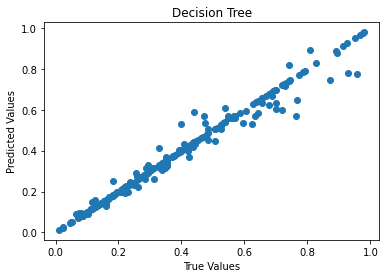

In [35]:
plt.title('Decision Tree')
plt.scatter(y_test,dtr_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### 3. Random Forest

In [36]:
rfr=RandomForestRegressor(random_state=42)
rfr.fit(x,y)
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9634426928136154
0.9632526729450868


In [37]:
rfr_pred = rfr.predict(x_test)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_accuracy= r2_score(y_test, rfr_pred)
print('Random Forest MAE: ',rfr_mae)
print('Random Forest MSE: ',rfr_mse)
print('Random Forest RMSE: ',rfr_rmse)
print("Random Forest R2: ",rfr_accuracy)

Random Forest MAE:  0.02966285977225926
Random Forest MSE:  0.0019696432962395378
Random Forest RMSE:  0.04438066353987441
Random Forest R2:  0.9632526729450868


Text(0, 0.5, 'Predicted Values')

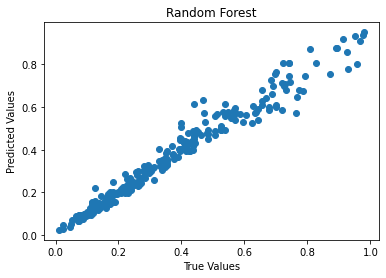

In [38]:
plt.title('Random Forest')
plt.scatter(y_test,rfr_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### 4. KNN

In [39]:
kreg=KNeighborsRegressor()
kreg.fit(x,y)
print(kreg.score(x_train,y_train))
print(kreg.score(x_test,y_test))

0.8550260433903345
0.8569949452053723


In [40]:
kreg_pred = kreg.predict(x_test)
kreg_mae = mean_absolute_error(y_test, kreg_pred)
kreg_mse = mean_squared_error(y_test, kreg_pred)
kreg_rmse = np.sqrt(kreg_mse)
kreg_accuracy= r2_score(y_test, kreg_pred)
print('KRegression MAE: ',kreg_mae)
print('KRegression MSE: ',kreg_mse)
print('KRegression RMSE: ',kreg_rmse)
print("KRegression R2: ",kreg_accuracy)

KRegression MAE:  0.06233535311827957
KRegression MSE:  0.007665018657920222
KRegression RMSE:  0.08755009227819364
KRegression R2:  0.8569949452053723


Text(0, 0.5, 'Predicted Values')

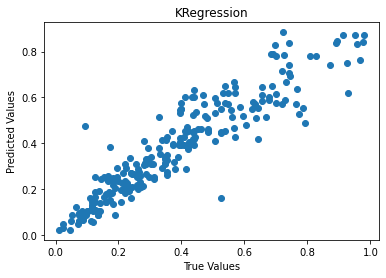

In [41]:
plt.title('KRegression')
plt.scatter(y_test,kreg_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### 5. SGD

In [42]:
sgdr=SGDRegressor(random_state=100)
sgdr.fit(x,y)
print(sgdr.score(x_train,y_train))
print(sgdr.score(x_test,y_test))

0.6014078633008942
0.5943983829220252


In [43]:
sgdr_pred = sgdr.predict(x_test)
sgdr_mae = mean_absolute_error(y_test, sgdr_pred)
sgdr_mse = mean_squared_error(y_test, sgdr_pred)
sgdr_rmse = np.sqrt(sgdr_mse)
sgdr_accuracy= r2_score(y_test, sgdr_pred)
print('sgdr MAE: ',sgdr_mae)
print('sgdr MSE: ',sgdr_mse)
print('sgdr RMSE: ',sgdr_rmse)
print("sgdr R2: ",sgdr_accuracy)

sgdr MAE:  0.11401958090741474
sgdr MSE:  0.02174009839757136
sgdr RMSE:  0.14744523863988068
sgdr R2:  0.5943983829220252


Text(0, 0.5, 'Predicted Values')

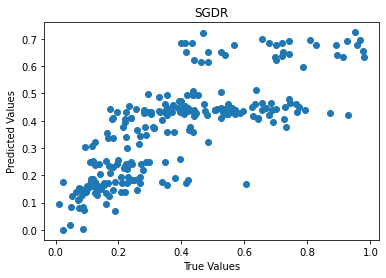

In [44]:
plt.title('SGDR')
plt.scatter(y_test,sgdr_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### 6. AdaBoost

In [45]:
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1,random_state=42)
abr.fit(x_train,y_train)
print(abr.score(x_train,y_train))
print(abr.score(x_test,y_test)) 

0.6900559638350292
0.6701848902061243


In [46]:
abr_pred = abr.predict(x_test)
abr_mae = mean_absolute_error(y_test, abr_pred)
abr_mse = mean_squared_error(y_test, abr_pred)
abr_rmse = np.sqrt(abr_mse)
abr_accuracy= r2_score(y_test, abr_pred)
print('AdaBoost Regressor MAE: ',abr_mae)
print('AdaBoost Regressor MSE: ',abr_mse)
print('AdaBoost Regressor RMSE: ',abr_rmse)
print('AdaBoost Regressor R2: ',abr_accuracy)

AdaBoost Regressor MAE:  0.10147865361234225
AdaBoost Regressor MSE:  0.01767796931279548
AdaBoost Regressor RMSE:  0.13295852478421788
AdaBoost Regressor R2:  0.6701848902061243


Text(0, 0.5, 'Predicted Values')

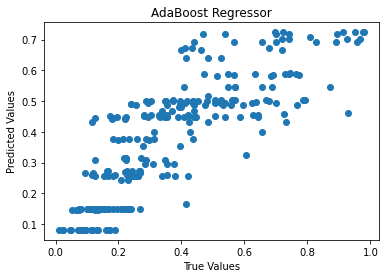

In [47]:
plt.title('AdaBoost Regressor')
plt.scatter(y_test,abr_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### 7.XGB

In [48]:
xgb = XGBRegressor(n_estimators=15,max_depth=3)
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.8087702516142193
0.7876485184121735


In [49]:
xgb_pred = xgb.predict(x_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_accuracy= r2_score(y_test, xgb_pred)
print('XGBoost Regressor MAE: ',xgb_mae)
print('XGBoost Regressor MSE: ',xgb_mse)
print('XGBoost Regressor RMSE: ',xgb_rmse)
print('XGBoost Regressor R2: ',xgb_accuracy)

XGBoost Regressor MAE:  0.07995600480107902
XGBoost Regressor MSE:  0.011381961782716223
XGBoost Regressor RMSE:  0.10668627738709521
XGBoost Regressor R2:  0.7876485184121735


Text(0, 0.5, 'Predicted Values')

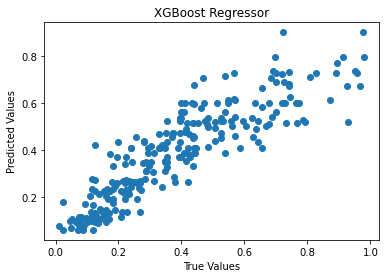

In [50]:
plt.title('XGBoost Regressor')
plt.scatter(y_test,xgb_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### Voting Classifier

In [51]:
vc = VotingRegressor(estimators=[('rfr',rfr),('dtr',dtr),('xgb',xgb),('abr',abr),('sgdr',sgdr),('lr',lr),('kreg',kreg)])
vc.fit(x_train, y_train)
print(vc.score(x_train,y_train))
print(vc.score(x_test,y_test))

0.8614220209595285
0.7949634690918885


In [52]:
vc_pred = vc.predict(x_test)
vc_mae = mean_absolute_error(y_test, vc_pred)
vc_mse = mean_squared_error(y_test, vc_pred)
vc_rmse = np.sqrt(vc_mse)
vc_accuracy= r2_score(y_test, vc_pred)
print('Voting Regressor MAE: ',vc_mae)
print('Voting Regressor MSE: ',vc_mse)
print('Voting Regressor RMSE: ',vc_rmse)
print('Voting Regressor R2: ',vc_accuracy)

Voting Regressor MAE:  0.07770255104307457
Voting Regressor MSE:  0.01098988310044654
Voting Regressor RMSE:  0.10483264329609619
Voting Regressor R2:  0.7949634690918885


Text(0, 0.5, 'Predicted Values')

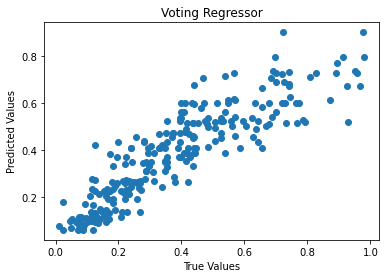

In [53]:
plt.title('Voting Regressor')
plt.scatter(y_test,xgb_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")